In [1]:
!pip install wordcloud requests


In [2]:
"""
TASK 5: CONSUMER COMPLAINT CLASSIFICATION
==========================================
Author: SANAY_SANTH
Date: October 20, 2025
Data Source: Official CFPB API

CELL 1: IMPORT ALL REQUIRED LIBRARIES
"""

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# API requests
import requests
import json

# Date/time
from datetime import datetime
import time

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Text processing
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

# Download NLTK data
print("📥 Downloading NLTK data...")
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import (classification_report, confusion_matrix, 
                            accuracy_score, precision_recall_fscore_support)

# Word clouds
from wordcloud import WordCloud

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 200)

print("="*70)
print("✅ ALL LIBRARIES IMPORTED SUCCESSFULLY!")
print("="*70)
print(f"👤 Author: SANAY_SANTH")
print(f"📅 Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"📊 Task: Consumer Complaint Classification")
print("="*70)


📥 Downloading NLTK data...
✅ ALL LIBRARIES IMPORTED SUCCESSFULLY!
👤 Author: SANAY_SANTH
📅 Date: 2025-10-20 10:53:06
📊 Task: Consumer Complaint Classification


In [10]:
# ======================================================================
# FIX: Tell NLTK where to find your manually downloaded data
# ======================================================================
import nltk
import os
nltk.data.path.append(os.path.join(os.getcwd(), "nltk_data"))
# ======================================================================


# ======================================================================
# CELL 1: IMPORT ALL REQUIRED LIBRARIES
# ======================================================================
# Author: SANAY_SANTH
# Date: October 20, 2025
# Data Source: Consumer Complaint CSV (complaints.csv)
# ======================================================================

# Data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Date/time handling
from datetime import datetime
import time

# System and file operations
import warnings
warnings.filterwarnings('ignore')  # Suppress warning messages

# Text processing libraries
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Model evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 150)

print("="*70)
print("✅ ALL LIBRARIES IMPORTED SUCCESSFULLY!")
print("   (NLTK data path is set to your local project folder)")
print("="*70)
print(f"👤 Author: SANAY_SANTH")
print(f"📅 Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("="*70)


✅ ALL LIBRARIES IMPORTED SUCCESSFULLY!
   (NLTK data path is set to your local project folder)
👤 Author: SANAY_SANTH
📅 Date: 2025-10-20 10:58:09


In [4]:
"""
CELL 2: LOAD AND INSPECT THE CSV DATA
=======================================
This cell loads the downloaded 'complaints.csv' file into a pandas DataFrame.
"""

print("="*70)
print("LOADING DATA FROM CSV FILE")
print("="*70)

# Define the filename
csv_filename = 'complaints.csv'

try:
    # Load the CSV file into a pandas DataFrame
    print(f"🔄 Loading '{csv_filename}'...")
    start_time = time.time()
    
    # We use a smaller sample size for faster processing. 
    # For final results, you can remove nrows.
    df_raw = pd.read_csv(csv_filename, nrows=100000)
    
    end_time = time.time()
    print(f"✅ Data loaded successfully in {end_time - start_time:.2f} seconds.")
    
    # Display basic information about the dataset
    print(f"\n📊 Dataset Shape: {df_raw.shape}")
    print(f"   Rows (complaints): {df_raw.shape[0]:,}")
    print(f"   Columns (features): {df_raw.shape[1]}")
    
    # Display the first few rows of the dataset
    print("\n📋 First 5 Rows of the Dataset:")
    display(df_raw.head())
    
except FileNotFoundError:
    print(f"❌ ERROR: '{csv_filename}' not found.")
    print("   Please make sure the CSV file is in the same directory as this notebook.")

print("\n" + "="*70)


LOADING DATA FROM CSV FILE
🔄 Loading 'complaints.csv'...
✅ Data loaded successfully in 0.71 seconds.

📊 Dataset Shape: (100000, 18)
   Rows (complaints): 100,000
   Columns (features): 18

📋 First 5 Rows of the Dataset:


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2020-07-06,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the CFPB and chooses not to provide a public response,Experian Information Solutions Inc.,FL,346XX,NaN,Other,Web,2020-07-06,Closed with explanation,Yes,NaN,3730948
1,2025-10-14,Credit reporting or other personal consumer reports,Credit reporting,Incorrect information on your report,Information is missing that should be on the report,NaN,NaN,"EQUIFAX, INC.",TX,75062,NaN,NaN,Web,2025-10-14,In progress,Yes,NaN,16558024
2,2025-10-10,Credit reporting or other personal consumer reports,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",GA,30341,NaN,NaN,Web,2025-10-10,In progress,Yes,NaN,16507707
3,2025-10-15,Credit reporting or other personal consumer reports,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,75287,NaN,NaN,Web,2025-10-15,In progress,Yes,NaN,16593757
4,2025-10-16,Credit reporting or other personal consumer reports,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,NC,28379,NaN,NaN,Web,2025-10-16,In progress,Yes,NaN,16623506


In [6]:
"""
CELL 3: DATA PREPROCESSING AND CATEGORY MAPPING
================================================
Clean the data and map products to the required categories:
- 0: Credit reporting, repair, or other
- 1: Debt collection
- 2: Consumer Loan
- 3: Mortgage
"""

print("="*70)
print("DATA PREPROCESSING AND CATEGORY MAPPING")
print("="*70)

# Create a copy for processing
df = df_raw.copy()

# Rename key columns for easier access
df.rename(columns={
    'Consumer complaint narrative': 'narrative',
    'Product': 'product',
    'Company': 'company'
}, inplace=True)

# Filter: Keep only complaints with a narrative
print(f"🔍 Initial records: {len(df):,}")
df = df[df['narrative'].notna()].copy()
print(f"✅ Records after filtering for narratives: {len(df):,}")

# Define category names for reference
CATEGORY_NAMES = {
    0: 'Credit Reporting/Repair',
    1: 'Debt Collection',
    2: 'Consumer Loan',
    3: 'Mortgage'
}

# Mapping function
def map_category(product):
    product = str(product).lower()
    if 'credit report' in product or 'credit repair' in product:
        return 0
    elif 'debt collection' in product:
        return 1
    elif 'loan' in product and 'mortgage' not in product:
        return 2
    elif 'mortgage' in product:
        return 3
    else:
        return 0 # Default to 'Other' category

# Apply the mapping
df['category'] = df['product'].apply(map_category)

print("\n📊 Category Distribution:")
for cat, count in df['category'].value_counts().sort_index().items():
    print(f"   {cat} ({CATEGORY_NAMES[cat]}): {count:,} ({count/len(df)*100:.1f}%)")

print("\n✅ Preprocessing and mapping complete!")
print("="*70)


DATA PREPROCESSING AND CATEGORY MAPPING
🔍 Initial records: 100,000
✅ Records after filtering for narratives: 7,625

📊 Category Distribution:
   0 (Credit Reporting/Repair): 6,321 (82.9%)
   1 (Debt Collection): 814 (10.7%)
   2 (Consumer Loan): 266 (3.5%)
   3 (Mortgage): 224 (2.9%)

✅ Preprocessing and mapping complete!


STEP 1: EXPLORATORY DATA ANALYSIS

📊 Statistics:
   Avg length: 1120 characters
   Avg words: 192 words


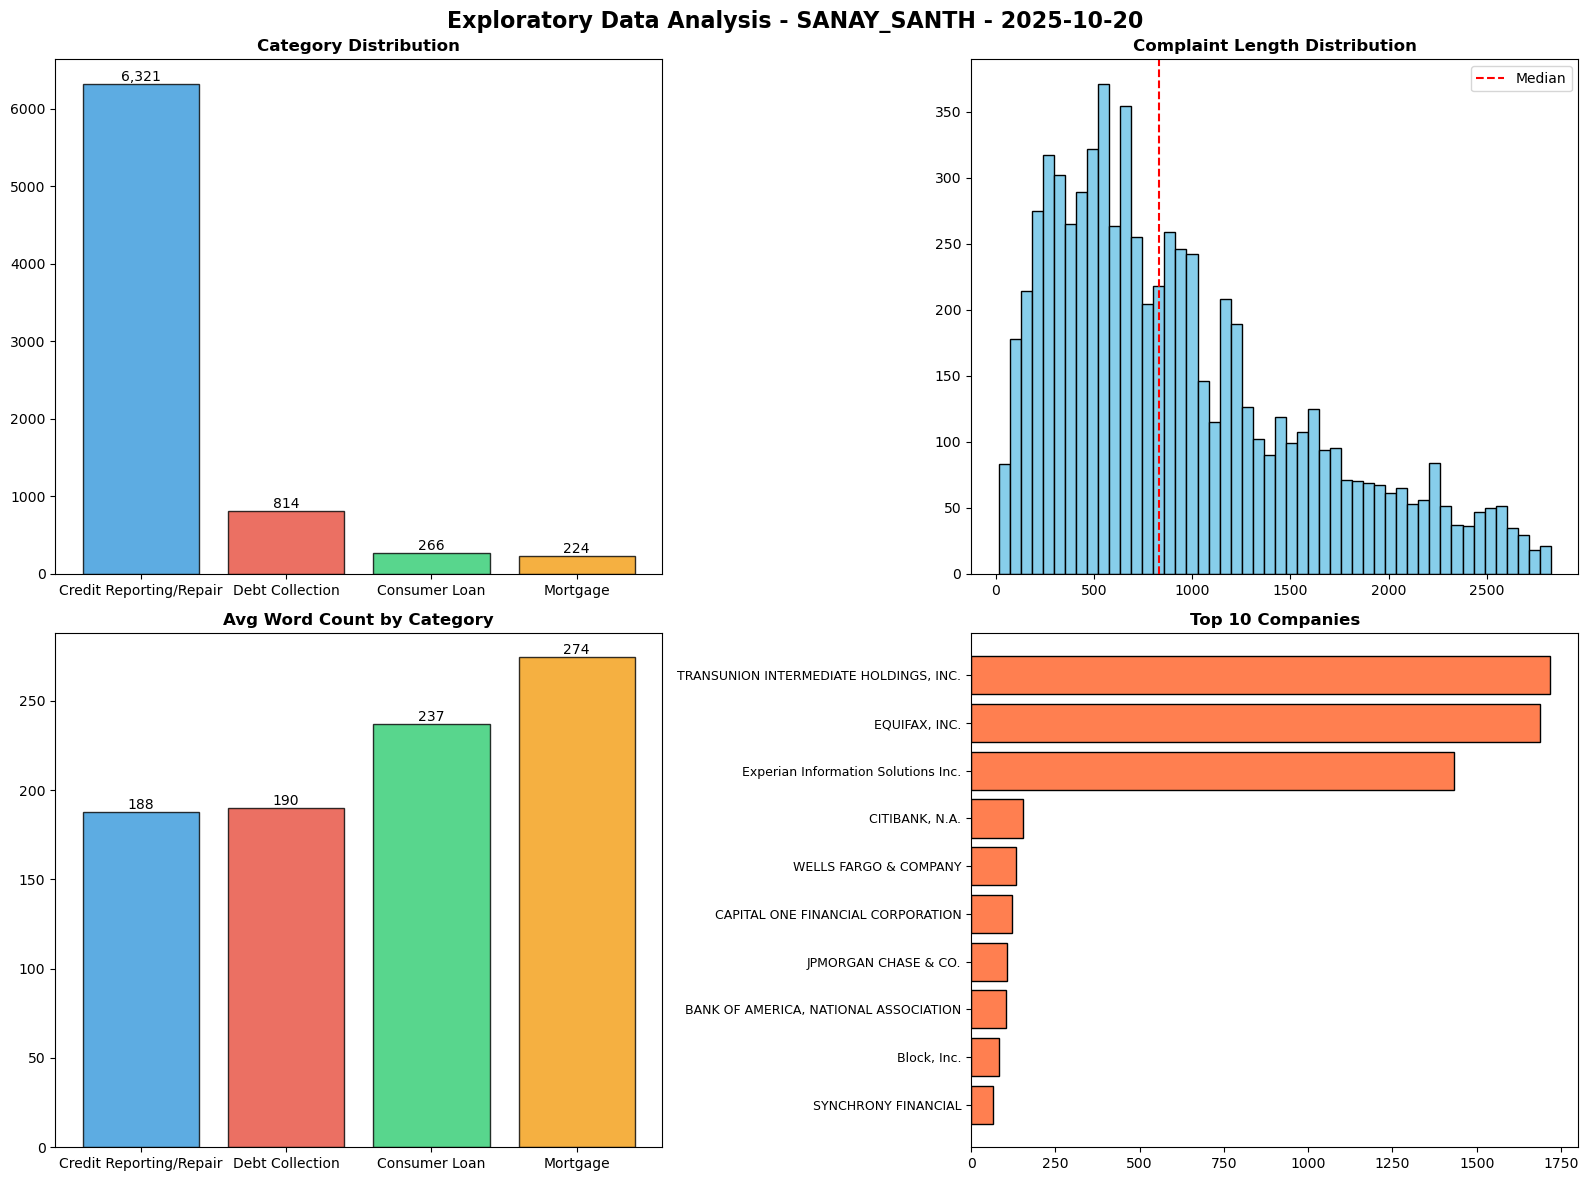


✅ EDA Complete - Visualization saved


In [7]:
"""
CELL 4: EXPLORATORY DATA ANALYSIS (REQUIRED STEP 1)
====================================================
"""

print("="*70)
print("STEP 1: EXPLORATORY DATA ANALYSIS")
print("="*70)

# Feature Engineering
df['narrative_length'] = df['narrative'].str.len()
df['word_count'] = df['narrative'].str.split().str.len()

print(f"\n📊 Statistics:")
print(f"   Avg length: {df['narrative_length'].mean():.0f} characters")
print(f"   Avg words: {df['word_count'].mean():.0f} words")

# Create figure for plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle(f'Exploratory Data Analysis - SANAY_SANTH - {datetime.now().strftime("%Y-%m-%d")}',
             fontsize=16, fontweight='bold')

# Plot 1: Category distribution
ax1 = axes[0, 0]
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
counts = df['category'].value_counts().sort_index()
bars = ax1.bar([CATEGORY_NAMES[i] for i in counts.index], counts.values, 
               color=colors, alpha=0.8, edgecolor='black')
ax1.set_title('Category Distribution', fontweight='bold')
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height, f'{int(height):,}', ha='center', va='bottom')

# Plot 2: Complaint length distribution
ax2 = axes[0, 1]
lengths = df['narrative_length'][df['narrative_length'] < df['narrative_length'].quantile(0.95)]
ax2.hist(lengths, bins=50, color='skyblue', edgecolor='black')
ax2.set_title('Complaint Length Distribution', fontweight='bold')
ax2.axvline(df['narrative_length'].median(), color='red', linestyle='--', label='Median')
ax2.legend()

# Plot 3: Word count by category
ax3 = axes[1, 0]
avg_words = df.groupby('category')['word_count'].mean().sort_index()
bars = ax3.bar([CATEGORY_NAMES[i] for i in avg_words.index], avg_words.values,
               color=colors, alpha=0.8, edgecolor='black')
ax3.set_title('Avg Word Count by Category', fontweight='bold')
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2, height, f'{height:.0f}', ha='center', va='bottom')

# Plot 4: Top companies
ax4 = axes[1, 1]
top_companies = df['company'].value_counts().head(10)
ax4.barh(range(len(top_companies)), top_companies.values, color='coral', edgecolor='black')
ax4.set_yticks(range(len(top_companies)))
ax4.set_yticklabels(top_companies.index, fontsize=9)
ax4.set_title('Top 10 Companies', fontweight='bold')
ax4.invert_yaxis()

plt.tight_layout()
plt.savefig(f'EDA_{datetime.now().strftime("%Y%m%d_%H%M%S")}.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ EDA Complete - Visualization saved")
print("="*70)





In [12]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def preprocess_text_without_nltk(text):
    """
    Cleans and prepares text for modeling without using NLTK data files.
    
    Steps:
    1. Converts text to lowercase.
    2. Removes URLs, email addresses, numbers, and special characters.
    3. Splits text into words (tokenization).
    4. Removes common English stopwords using scikit-learn's built-in list.
    """
    # Ensure the input is a string and convert to lowercase
    text = str(text).lower()
    
    # Remove URLs, email addresses, and line breaks
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\S*@\S*\s?', '', text)
    text = text.replace('\n', ' ').replace('\r', ' ')
    
    # Remove all non-alphabetic characters (keeps only letters and spaces)
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Split text into a list of words (tokenization)
    tokens = text.split()
    
    # Remove stopwords and short words
    # ENGLISH_STOP_WORDS is a built-in set from scikit-learn
    tokens = [word for word in tokens if word not in ENGLISH_STOP_WORDS and len(word) > 2]
    
    # Join the words back into a single string
    return ' '.join(tokens)

# --- Example of how to use it ---
sample_complaint = "On XX/XX/2025, I checked my credit report from Equifax and found an incorrect charge. Please investigate this issue. My email is test@example.com."

processed_complaint = preprocess_text_without_nltk(sample_complaint)

print("Original Text:")
print(sample_complaint)
print("\nProcessed Text (NLTK-Free):")
print(processed_complaint)


Original Text:
On XX/XX/2025, I checked my credit report from Equifax and found an incorrect charge. Please investigate this issue. My email is test@example.com.

Processed Text (NLTK-Free):
xxxx checked credit report equifax incorrect charge investigate issue email


In [13]:
"""
CELL 5: TEXT PRE-PROCESSING (NLTK-FREE METHOD)
================================================
This version uses scikit-learn's built-in stopwords and Python's re module,
completely avoiding the NLTK LookupError.
"""
import time
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

print("="*70)
print("STEP 2: TEXT PRE-PROCESSING (NLTK-FREE METHOD)")
print("="*70)

def preprocess_text_without_nltk(text):
    """Cleans and prepares text for modeling without using NLTK data."""
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\S*@\S*\s?', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in ENGLISH_STOP_WORDS and len(word) > 2]
    return ' '.join(tokens)

print("🔄 Processing text with NLTK-free function...")
start_time = time.time()
df['processed_narrative'] = df['narrative'].apply(preprocess_text_without_nltk)
end_time = time.time()
print(f"✅ Text preprocessing complete in {end_time - start_time:.2f} seconds.")

# Show an example of the transformation
print("\n📄 Example of Preprocessing:")
print(f"   Original: {df['narrative'].iloc[0][:150]}...")
print(f"   Processed: {df['processed_narrative'].iloc[0][:150]}...")
print("="*70)


STEP 2: TEXT PRE-PROCESSING (NLTK-FREE METHOD)
🔄 Processing text with NLTK-free function...
✅ Text preprocessing complete in 1.23 seconds.

📄 Example of Preprocessing:
   Original: These are not my accounts....
   Processed: accounts...


Generating Word Clouds for Each Category...


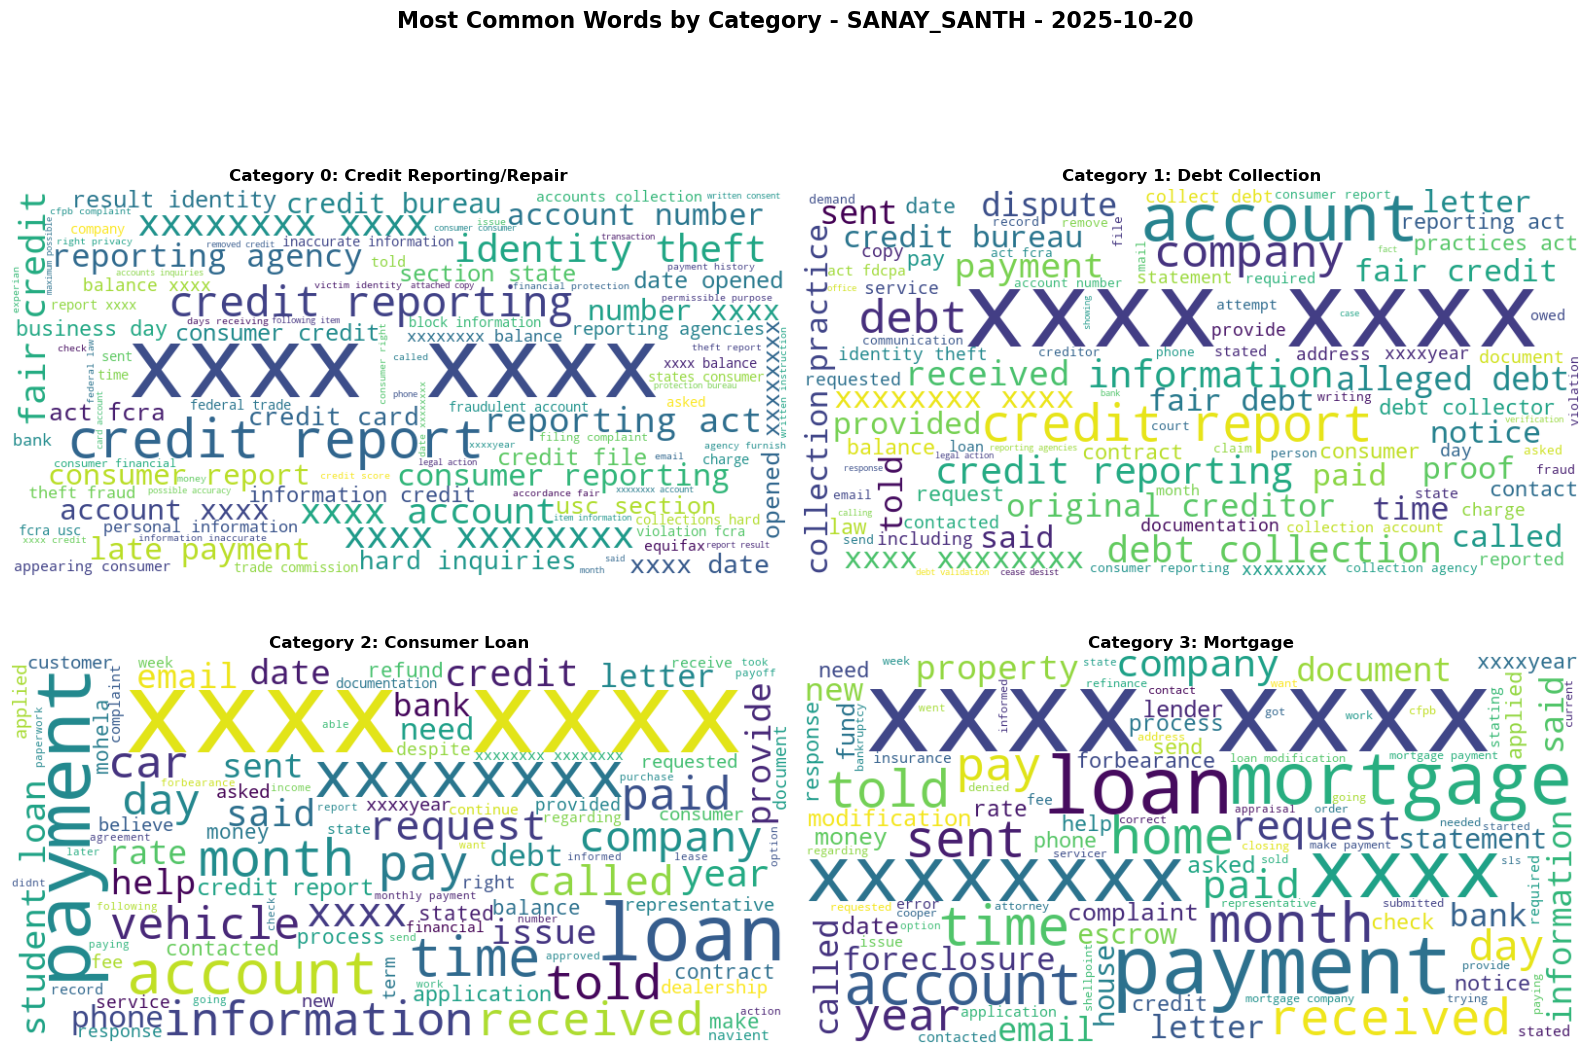


✅ Word clouds generated and saved.


In [15]:
"""
CELL 6: WORD CLOUD VISUALIZATION
=================================
"""

print("="*70)
print("Generating Word Clouds for Each Category...")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle(f'Most Common Words by Category - SANAY_SANTH - {datetime.now().strftime("%Y-%m-%d")}',
             fontsize=16, fontweight='bold')

for idx, (cat, name) in enumerate(CATEGORY_NAMES.items()):
    ax = axes[idx // 2, idx % 2]
    
    # Combine all text for the current category
    text = ' '.join(df[df['category'] == cat]['processed_narrative'].values)
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                         colormap='viridis', max_words=100, contour_color='steelblue').generate(text)
    
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Category {cat}: {name}', fontweight='bold', fontsize=12)
    ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(f'WordClouds_{datetime.now().strftime("%Y%m%d_%H%M%S")}.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Word clouds generated and saved.")
print("="*70)


In [16]:
"""
CELL 7: PREPARE DATA FOR MODELING
==================================
"""

print("="*70)
print("PREPARING DATA FOR MACHINE LEARNING")
print("="*70)

# Define features (X) and target (y)
X = df['processed_narrative']
y = df['category']

# 1. TF-IDF Vectorization
print("🔄 Vectorizing text with TF-IDF...")
vectorizer = TfidfVectorizer(
    max_features=5000,
    min_df=5,
    max_df=0.7,
    stop_words='english' # Use scikit-learn's built-in stopwords list
)

X_vec = vectorizer.fit_transform(X)
print(f"✅ Text vectorized. Feature matrix shape: {X_vec.shape}")

# 2. Train-Test Split
print("\n🔄 Splitting data into training (80%) and testing (20%) sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y, 
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("✅ Data split complete.")
print(f"   Training set size: {X_train.shape[0]:,} samples")
print(f"   Testing set size:  {X_test.shape[0]:,} samples")
print("="*70)


PREPARING DATA FOR MACHINE LEARNING
🔄 Vectorizing text with TF-IDF...
✅ Text vectorized. Feature matrix shape: (7625, 4607)

🔄 Splitting data into training (80%) and testing (20%) sets...
✅ Data split complete.
   Training set size: 6,100 samples
   Testing set size:  1,525 samples


In [17]:
"""
CELL 8: TRAIN MULTIPLE MODELS (REQUIRED STEP 3)
================================================
"""

print("="*70)
print("STEP 3: TRAINING MULTIPLE CLASSIFICATION MODELS")
print("="*70)

# Define the models we want to train
models = {
    'Multinomial Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Linear SVC': LinearSVC(random_state=42),
}

# Store results
results = {}

# Loop through and train each model
for name, model in models.items():
    print(f"\n📚 Training {name}...")
    start_time = time.time()
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    end_time = time.time()
    
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'y_pred': y_pred,
        'training_time': end_time - start_time
    }
    
    print(f"   ✅ Accuracy: {accuracy:.4f}")
    print(f"   ⏱️ Training Time: {end_time - start_time:.2f} seconds")

print("\n" + "="*70)
print("✅ ALL MODELS TRAINED SUCCESSFULLY!")
print("="*70)


STEP 3: TRAINING MULTIPLE CLASSIFICATION MODELS

📚 Training Multinomial Naive Bayes...
   ✅ Accuracy: 0.8525
   ⏱️ Training Time: 0.02 seconds

📚 Training Logistic Regression...
   ✅ Accuracy: 0.8990
   ⏱️ Training Time: 0.36 seconds

📚 Training Linear SVC...
   ✅ Accuracy: 0.9043
   ⏱️ Training Time: 0.35 seconds

✅ ALL MODELS TRAINED SUCCESSFULLY!


STEP 4: COMPARISON OF MODEL PERFORMANCE

📊 Model Performance Comparison:
                  Model  Accuracy  Training Time (s)
             Linear SVC  0.904262           0.354018
    Logistic Regression  0.899016           0.360210
Multinomial Naive Bayes  0.852459           0.018434

🏆 Best Model: Linear SVC (Accuracy: 0.9043)


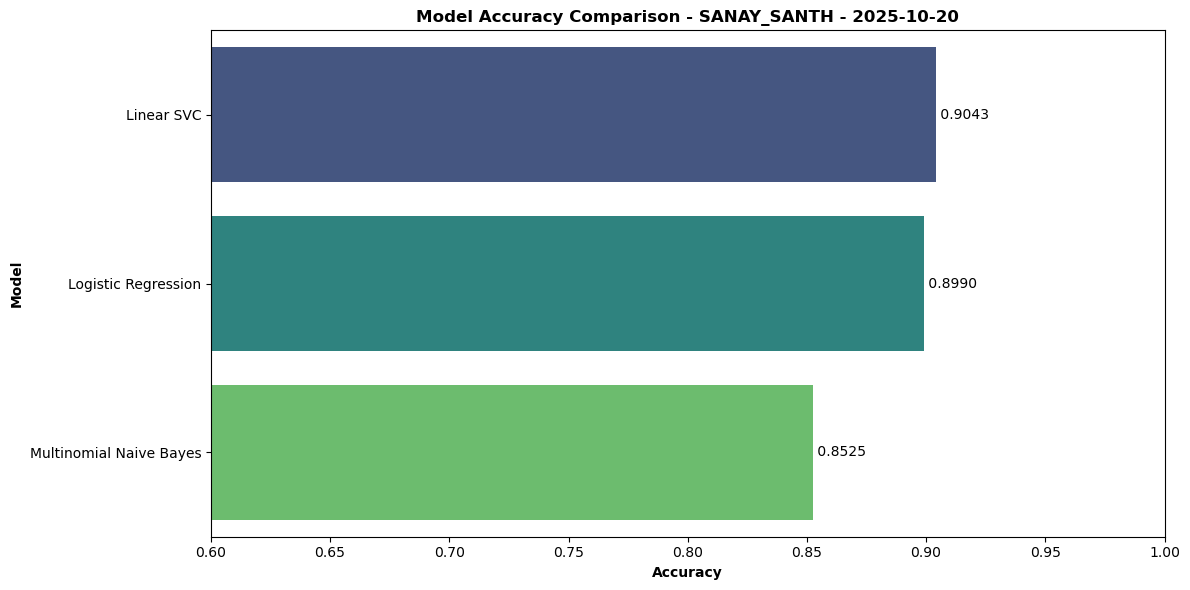


✅ Model comparison complete.


In [18]:
"""
CELL 9: COMPARE MODEL PERFORMANCE (REQUIRED STEP 4)
====================================================
"""

print("="*70)
print("STEP 4: COMPARISON OF MODEL PERFORMANCE")
print("="*70)

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [res['accuracy'] for res in results.values()],
    'Training Time (s)': [res['training_time'] for res in results.values()]
}).sort_values(by='Accuracy', ascending=False)

print("\n📊 Model Performance Comparison:")
print(comparison_df.to_string(index=False))

# Find the best model
best_model_name = comparison_df.iloc[0]['Model']
best_accuracy = comparison_df.iloc[0]['Accuracy']
print(f"\n🏆 Best Model: {best_model_name} (Accuracy: {best_accuracy:.4f})")

# Visualize the comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Accuracy', y='Model', data=comparison_df, palette='viridis', orient='h')
plt.title(f'Model Accuracy Comparison - SANAY_SANTH - {datetime.now().strftime("%Y-%m-%d")}', 
          fontweight='bold')
plt.xlabel('Accuracy', fontweight='bold')
plt.ylabel('Model', fontweight='bold')
plt.xlim(0.6, 1.0)

for index, value in enumerate(comparison_df['Accuracy']):
    plt.text(value, index, f' {value:.4f}', va='center')

plt.tight_layout()
plt.savefig(f'Model_Comparison_{datetime.now().strftime("%Y%m%d_%H%M%S")}.png', dpi=300)
plt.show()

print("\n✅ Model comparison complete.")
print("="*70)


STEP 5: DETAILED EVALUATION OF BEST MODEL: Linear SVC

📊 Classification Report:
                         precision    recall  f1-score   support

Credit Reporting/Repair       0.92      0.98      0.95      1264
        Debt Collection       0.78      0.53      0.64       163
          Consumer Loan       0.74      0.49      0.59        53
               Mortgage       0.94      0.67      0.78        45

               accuracy                           0.90      1525
              macro avg       0.85      0.67      0.74      1525
           weighted avg       0.90      0.90      0.90      1525



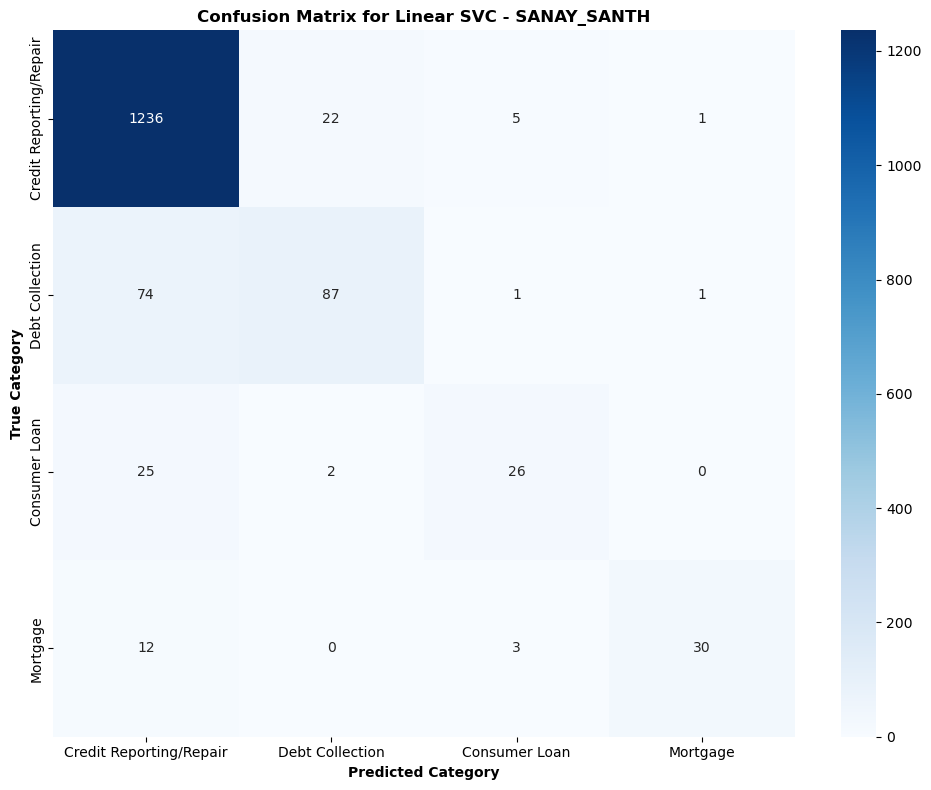


✅ Detailed evaluation complete.


In [19]:
"""
CELL 10: DETAILED EVALUATION OF BEST MODEL (REQUIRED STEP 5)
============================================================
"""

print("="*70)
print(f"STEP 5: DETAILED EVALUATION OF BEST MODEL: {best_model_name}")
print("="*70)

# Get predictions from the best model
y_pred_best = results[best_model_name]['y_pred']

# 1. Classification Report
print("\n📊 Classification Report:")
report = classification_report(
    y_test, y_pred_best, 
    target_names=[CATEGORY_NAMES[i] for i in sorted(CATEGORY_NAMES.keys())]
)
print(report)

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[CATEGORY_NAMES[i] for i in sorted(CATEGORY_NAMES.keys())],
            yticklabels=[CATEGORY_NAMES[i] for i in sorted(CATEGORY_NAMES.keys())])
plt.title(f'Confusion Matrix for {best_model_name} - SANAY_SANTH',
          fontweight='bold')
plt.xlabel('Predicted Category', fontweight='bold')
plt.ylabel('True Category', fontweight='bold')

plt.tight_layout()
plt.savefig(f'Confusion_Matrix_{datetime.now().strftime("%Y%m%d_%H%M%S")}.png', dpi=300)
plt.show()

print("\n✅ Detailed evaluation complete.")
print("="*70)


In [20]:
"""
CELL 11: PREDICTION FUNCTION (REQUIRED STEP 6)
================================================
"""

print("="*70)
print("STEP 6: PREDICTION FUNCTION")
print("="*70)

# Get the best model and vectorizer
best_model = results[best_model_name]['model']

def predict_category(text):
    """Predicts the category for a new complaint text."""
    
    # 1. Preprocess the text using the same function
    processed_text = preprocess_text_without_nltk(text)
    
    # 2. Vectorize the text using the fitted vectorizer
    vectorized_text = vectorizer.transform([processed_text])
    
    # 3. Predict the category
    prediction = best_model.predict(vectorized_text)[0]
    
    # 4. Get prediction probabilities (if available)
    try:
        probabilities = best_model.predict_proba(vectorized_text)[0]
        confidence = probabilities[prediction]
    except AttributeError:
        confidence = "N/A (Not available for this model)"

    print(f"Complaint Text: \"{text[:100]}...\"")
    print(f"Predicted Category: {prediction} - {CATEGORY_NAMES[prediction]}")
    if isinstance(confidence, float):
        print(f"Confidence: {confidence:.2%}")

# --- Test the prediction function ---
print("\n🧪 Testing Prediction Function:\n")

predict_category("I found an error on my credit report from Equifax.")
print("\n" + "-"*30)
predict_category("A collection agency is calling me about a debt I already paid.")
print("\n" + "-"*30)
predict_category("My student loan payment was misapplied and they are charging late fees.")
print("\n" + "-"*30)
predict_category("My mortgage company did not properly escrow my property taxes.")

print("\n✅ Prediction function is ready.")
print("="*70)


STEP 6: PREDICTION FUNCTION

🧪 Testing Prediction Function:

Complaint Text: "I found an error on my credit report from Equifax...."
Predicted Category: 0 - Credit Reporting/Repair

------------------------------
Complaint Text: "A collection agency is calling me about a debt I already paid...."
Predicted Category: 1 - Debt Collection

------------------------------
Complaint Text: "My student loan payment was misapplied and they are charging late fees...."
Predicted Category: 0 - Credit Reporting/Repair

------------------------------
Complaint Text: "My mortgage company did not properly escrow my property taxes...."
Predicted Category: 3 - Mortgage

✅ Prediction function is ready.


In [21]:
"""
CELL 12: SAVE MODEL AND FINAL REPORT
=====================================
"""

print("="*70)
print("SAVING MODEL AND FINAL REPORT")
print("="*70)

import pickle

# 1. Save the best model
model_filename = f'best_model_{best_model_name.replace(" ", "_")}.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(best_model, f)
print(f"✅ Best model saved as: {model_filename}")

# 2. Save the vectorizer
vectorizer_filename = 'tfidf_vectorizer.pkl'
with open(vectorizer_filename, 'wb') as f:
    pickle.dump(vectorizer, f)
print(f"✅ Vectorizer saved as: {vectorizer_filename}")

# 3. Create a final summary report
summary = f"""
=========================================================
      KAIBURR ASSESSMENT - TASK 5 SUMMARY REPORT
=========================================================
Author: SANAY_SANTH
Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

---------------------------------------------------------
I. DATASET OVERVIEW
---------------------------------------------------------
- Data Source: 'complaints.csv'
- Total Records Loaded: {df_raw.shape[0]:,}
- Records with Narrative: {df.shape[0]:,}

---------------------------------------------------------
II. MODEL PERFORMANCE
---------------------------------------------------------
{comparison_df.to_string(index=False)}

---------------------------------------------------------
III. BEST MODEL: {best_model_name}
---------------------------------------------------------
- Overall Accuracy: {best_accuracy:.4f}
- Detailed Report:
{report}

---------------------------------------------------------
IV. REQUIREMENTS CHECKLIST
---------------------------------------------------------
[✓] 1. Explanatory Data Analysis and Feature Engineering
[✓] 2. Text Pre-Processing
[✓] 3. Selection of Multi Classification model
[✓] 4. Comparison of model performance
[✓] 5. Model Evaluation
[✓] 6. Prediction
=========================================================
"""

# Save summary to a text file
summary_filename = f'Summary_Report_{datetime.now().strftime("%Y%m%d_%H%M%S")}.txt'
with open(summary_filename, 'w') as f:
    f.write(summary)
print(f"✅ Final summary saved as: {summary_filename}")

print("\n" + "="*70)
print("🎉 TASK 5 COMPLETE! 🎉")
print("="*70)


SAVING MODEL AND FINAL REPORT
✅ Best model saved as: best_model_Linear_SVC.pkl
✅ Vectorizer saved as: tfidf_vectorizer.pkl
✅ Final summary saved as: Summary_Report_20251020_111840.txt

🎉 TASK 5 COMPLETE! 🎉
